<a href="https://colab.research.google.com/github/Sandyzhen/spotify-review-sentiment-bilstm/blob/main/%E5%9F%BA%E6%96%BCBi_LSTM%E5%B0%8DSpotify%E7%94%A8%E6%88%B6%E8%A9%95%E8%AB%96%E9%80%B2%E8%A1%8C%E6%83%85%E7%B7%92%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**深度學習報告**

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

import os
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
data=pd.read_csv("/content/spotify評論3.csv")



In [ ]:
# 將 data中content欄位的所有文字轉換為小寫
data['content'] = data['content'].str.lower()

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.0 MB/s eta 0:00:00


In [ ]:
import contractions

data['ReviewContractions'] = data['content'].apply(lambda x: contractions.fix(x))

# Some examples
print(data['content'][4])
print(data['ReviewContractions'][4])

recently i've noticed the shuffle feature is limited to maybe 10-20 songs in a loop out of 2000 songs. i have to manually go into my playlist and select a random song to make the shuffle feature play different songs. itll play the same song 10 times over again while other songs i haven't heard in months. why!?!
recently i have noticed the shuffle feature is limited to maybe 10-20 songs in a loop out of 2000 songs. i have to manually go into my playlist and select a random song to make the shuffle feature play different songs. it will play the same song 10 times over again while other songs i have not heard in months. why!?!


In [ ]:
data.ReviewContractions = data.ReviewContractions.replace(r'\d+', '', regex=True)

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenization
def tokenization(inputs):
    return word_tokenize(inputs)


data['ReviewTokenized'] = data['ReviewContractions'].apply(tokenization)
print(data.ReviewContractions[600])
print(data.ReviewTokenized[600])

not sure what happened in this last update but the app keeps freezing and closing when i listen for more than 10 minutes. please fix this.
['not', 'sure', 'what', 'happened', 'in', 'this', 'last', 'update', 'but', 'the', 'app', 'keeps', 'freezing', 'and', 'closing', 'when', 'i', 'listen', 'for', 'more', 'than', '10', 'minutes', '.', 'please', 'fix', 'this', '.']


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Stopwords Removal
stop_words = set(stopwords.words('english'))
stop_words.remove('not')


def stopwordsRemove(inputs):
    return [item for item in inputs if item not in stop_words]


data['ReviewStop'] = data['ReviewTokenized'].apply(stopwordsRemove)
print(data.ReviewTokenized[5])
print(data.ReviewStop[5])

['the', 'smart', 'shuffle', 'and', 'recommendations', 'keep', 'turning', 'on', 'even', 'after', 'you', 'toggle', 'it', 'off', '.', 'please', 'do', 'something', 'about', 'it', '.', 'i', 'would', 'like', 'to', 'listen', 'to', 'only', 'the', 'songs', 'that', 'are', 'in', 'my', 'playlist', '.', 'also', 'the', 'sorted', 'order', 'does', 'not', 'play', 'in', 'the', 'queue', '.', 'it', 'automatically', 'goes', 'into', 'a', 'shuffle', 'mode', '.']
['smart', 'shuffle', 'recommendations', 'keep', 'turning', 'even', 'toggle', '.', 'please', 'something', '.', 'would', 'like', 'listen', 'songs', 'playlist', '.', 'also', 'sorted', 'order', 'not', 'play', 'queue', '.', 'automatically', 'goes', 'shuffle', 'mode', '.']


In [ ]:
import re
# Remove punctuations from tokenized text rows
def removePunctuation(inputs):
    p = re.compile(r'[^\w\s]+')
    return p.sub('', inputs)


data.ReviewStop = data.ReviewStop.apply(lambda x: list(map(removePunctuation, x)))
print(data.ReviewStop[5])
print(data.ReviewStop[5])

['smart', 'shuffle', 'recommendations', 'keep', 'turning', 'even', 'toggle', '', 'please', 'something', '', 'would', 'like', 'listen', 'songs', 'playlist', '', 'also', 'sorted', 'order', 'not', 'play', 'queue', '', 'automatically', 'goes', 'shuffle', 'mode', '']
['smart', 'shuffle', 'recommendations', 'keep', 'turning', 'even', 'toggle', '', 'please', 'something', '', 'would', 'like', 'listen', 'songs', 'playlist', '', 'also', 'sorted', 'order', 'not', 'play', 'queue', '', 'automatically', 'goes', 'shuffle', 'mode', '']


In [ ]:
# Removing Emojis from the text  # https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b


def removeEmoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


data['ReviewStop'] = data['ReviewStop'].apply(lambda x: list(map(removeEmoji, x)))
print(data.ReviewStop[5])
print(data.ReviewStop[600])

['smart', 'shuffle', 'recommendations', 'keep', 'turning', 'even', 'toggle', '.', 'please', 'something', '.', 'would', 'like', 'listen', 'songs', 'playlist', '.', 'also', 'sorted', 'order', 'not', 'play', 'queue', '.', 'automatically', 'goes', 'shuffle', 'mode', '.']
['not', 'sure', 'happened', 'last', 'update', 'app', 'keeps', 'freezing', 'closing', 'listen', '10', 'minutes', '.', 'please', 'fix', '.']


In [ ]:
def removeLessThan_2(inputs):
    return [j for j in inputs if len(j) > 2]

data['ReviewStop'] = data['ReviewStop'].apply(removeLessThan_2)

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()


def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=x, pos='v') for x in inputs]


data['ReviewLemmatized'] = data['ReviewStop'].apply(lemmatization)
print(data.ReviewStop[5])
print(data.ReviewLemmatized[5])

['smart', 'shuffle', 'recommendations', 'keep', 'turning', 'even', 'toggle', 'please', 'something', 'would', 'like', 'listen', 'songs', 'playlist', 'also', 'sorted', 'order', 'not', 'play', 'queue', 'automatically', 'goes', 'shuffle', 'mode']
['smart', 'shuffle', 'recommendations', 'keep', 'turn', 'even', 'toggle', 'please', 'something', 'would', 'like', 'listen', 'songs', 'playlist', 'also', 'sort', 'order', 'not', 'play', 'queue', 'automatically', 'go', 'shuffle', 'mode']


In [ ]:
# Joining Tokens into Sentences
data['ReviewFinal'] = data['ReviewLemmatized'].str.join(' ')
print(data.ReviewLemmatized[5])
print(data.ReviewFinal[5])

['smart', 'shuffle', 'recommendations', 'keep', 'turn', 'even', 'toggle', 'please', 'something', 'would', 'like', 'listen', 'songs', 'playlist', 'also', 'sort', 'order', 'not', 'play', 'queue', 'automatically', 'go', 'shuffle', 'mode']
smart shuffle recommendations keep turn even toggle please something would like listen songs playlist also sort order not play queue automatically go shuffle mode


In [ ]:
# Combining 5 different Labels into 2
data.score= data.score.replace({5: 'positive', 4: 'positive', 3: 'positive', 2: 'negative', 1: 'negative'})

good_count = (data.score == 'positive').sum()
bad_count = (data.score== 'negative').sum()

print(good_count)
print(bad_count)

5000
5000


In [ ]:
# Train Test Split
X_train, X_temp, y_train, y_temp = train_test_split(data.ReviewFinal,
                                                    data.score,
                                                    test_size=0.3,
                                                    random_state=42)

print(f"X_train Shape: {X_train.shape}")
# Train Validation set Split
X_val,X_test, y_val,y_test = train_test_split(X_temp,y_temp,test_size=1/3,random_state=42)

print(f"X_train Shape:{X_train.shape}")
print(f"X_val Shape: {X_val.shape}")
print(f"X_test Shape: {X_test.shape}")

X_train Shape: (7000,)
X_train Shape:(7000,)
X_val Shape: (2000,)
X_test Shape: (1000,)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, Bidirectional
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.layers import GlobalAvgPool1D
import tensorflow as tf

In [ ]:
# Tokenizing with Tensorflow
num_words =10000  # Maximum number of tokens for the Tokenizer

# Define Tokenizer and fit it with the X_train
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Apply the Tokenizer
Tokenized_train = tokenizer.texts_to_sequences(X_train)
Tokenized_val = tokenizer.texts_to_sequences(X_val)

In [ ]:
maxLen = 50  # Maximum length of each text
Padded_train = pad_sequences(Tokenized_train, maxlen=maxLen, padding='post')
Padded_val = pad_sequences(Tokenized_val, maxlen=maxLen, padding='post')

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 128, input_length=maxLen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),  # 添加 return_sequences=True
    tf.keras.layers.GlobalMaxPooling1D(),  # 添加池化層
    tf.keras.layers.Dropout(0.5),  # 增加 Dropout
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.BatchNormalization(),  # 添加BatchNormalization
    tf.keras.layers.Dropout(0.5),  # 增加另一个 Dropout
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),  # 調整學習率
              metrics=['accuracy'])

model_2.summary()


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 50, 128)           1280000   
                                                                 
 bidirectional_23 (Bidirect  (None, 50, 64)            41216     
 ional)                                                          
                                                                 
 global_max_pooling1d_21 (G  (None, 64)                0         
 lobalMaxPooling1D)                                              
                                                                 
 dropout_42 (Dropout)        (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 24)                1560      
                                                                 
 batch_normalization_21 (Ba  (None, 24)              

In [ ]:
label_ = {"negative": 0, "positive": 1}
y_train = y_train.replace(label_)
y_val = y_val.replace(label_)
y_test = y_test.replace(label_)

In [ ]:

# Define Early Stopping
# Define Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=5,
                                                restore_best_weights=True)
# Fit the model
epochs =10
hist = model_2.fit(Padded_train, y_train, batch_size=64, epochs=epochs,verbose=1,
                 validation_data=(Padded_val, y_val)
                 )

Epoch 1/10
110/110 [==============================] - 16s 89ms/step - loss: 0.7412 - accuracy: 0.5191 - val_loss: 0.6908 - val_accuracy: 0.6210
Epoch 2/10
110/110 [==============================] - 10s 91ms/step - loss: 0.6694 - accuracy: 0.5853 - val_loss: 0.6847 - val_accuracy: 0.6460
Epoch 3/10
110/110 [==============================] - 10s 90ms/step - loss: 0.6154 - accuracy: 0.6620 - val_loss: 0.6583 - val_accuracy: 0.7545
Epoch 4/10
110/110 [==============================] - 9s 78ms/step - loss: 0.5447 - accuracy: 0.7364 - val_loss: 0.5941 - val_accuracy: 0.7875
Epoch 5/10
110/110 [==============================] - 10s 89ms/step - loss: 0.4742 - accuracy: 0.7817 - val_loss: 0.4968 - val_accuracy: 0.8080
Epoch 6/10
110/110 [==============================] - 10s 90ms/step - loss: 0.4273 - accuracy: 0.8106 - val_loss: 0.4309 - val_accuracy: 0.8145
Epoch 7/10
110/110 [==============================] - 9s 86ms/step - loss: 0.3874 - accuracy: 0.8336 - val_loss: 0.4091 - val_accuracy: 0

In [ ]:
# Preparing the Test Data
Tokenized_test = tokenizer.texts_to_sequences(X_test)
Padded_test = pad_sequences(Tokenized_test, maxlen=maxLen, padding='post')

# Evaluating the Test Data
model_2.evaluate(Padded_test, y_test)

32/32 [==============================] - 0s 15ms/step - loss: 0.3757 - accuracy: 0.8290


[0.37567028403282166, 0.8289999961853027]

In [ ]:
# 使用模型对测试数据进行预测
y_pred_probs = model_2.predict(Padded_test)
y_pred_probs
# 将概率转换为类别标签
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]
from sklearn.metrics import classification_report

# 生成分类报告
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

# 打印分类报告
print(report)


32/32 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

     Class 0       0.80      0.86      0.83       478
     Class 1       0.86      0.80      0.83       522

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



--2023-12-27 05:48:54--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.15.238, 2607:f8b0:4025:802::200e
Connecting to drive.google.com (drive.google.com)|172.217.15.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8nl8fsk73as52mgkf8t285v7okt0q0et/1703656125000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=6229db08-8241-4636-aa27-a8744b5ae6ef [following]
--2023-12-27 05:48:55--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8nl8fsk73as52mgkf8t285v7okt0q0et/1703656125000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=6229db08-8241-4636-aa27-a8744b5ae6ef
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to doc-0k-9o-docs.go

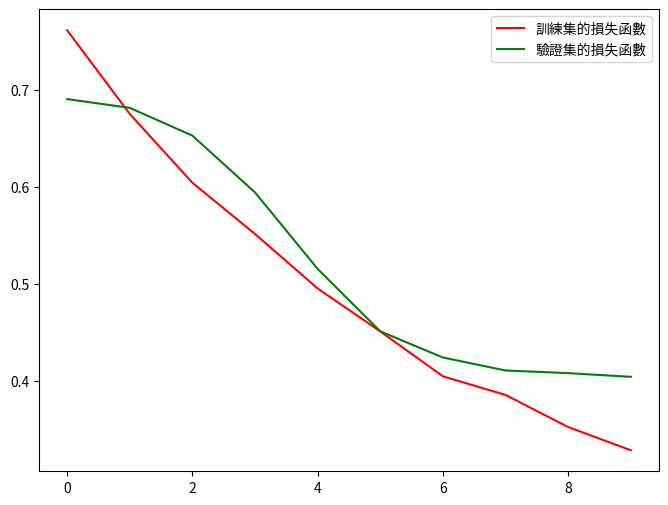

In [ ]:
hist.history.keys()
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(hist.history['loss'], 'r', label='訓練集的損失函數')
plt.plot(hist.history['val_loss'], 'g', label='驗證集的損失函數')
plt.legend()

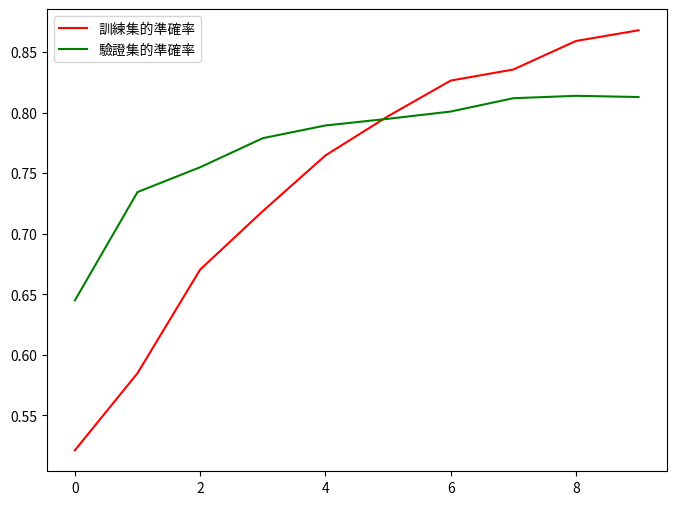

In [ ]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(hist.history['accuracy'], 'r', label='訓練集的準確率')
plt.plot(hist.history['val_accuracy'], 'g', label='驗證集的準確率')
plt.legend()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# 用於預測的句子
sentence = ["This playlist is absolutely fantastic every song is a delight",
            "I am really disappoint with the latest music update the track selection is poor"]

# 轉換為序列
sequences = tokenizer.texts_to_sequences(sentence)

# 填充序列
padded = pad_sequences(sequences, maxlen=50, padding='post')


In [ ]:
prediction = model_2.predict(padded)
prediction

1/1 [==============================] - 0s 27ms/step


array([[0.54563695],
       [0.6106249 ]], dtype=float32)

In [ ]:
prediction = model_2.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)


1/1 [==============================] - 0s 27ms/step
This playlist is absolutely fantastic every song is a delight
Predicted sentiment :  Positive
There are too many ads interrupting the music it is annoying and disruptive
Predicted sentiment :  Positive
